In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
indice_weight = pd.read_excel('data/Insurances.xlsx', sheet_name='raw_weight', skiprows=[1], index_col=0, parse_dates=True)
indice_weight.drop(columns=indice_weight.columns[0], inplace=True)
indice_weight.index.name = 'Date'
indice_weight = indice_weight.T
indice_weight.index = pd.to_datetime(indice_weight.index, format='%m/%d/%Y')
indice_weight = indice_weight / 100
indice_weight.replace(0, np.nan, inplace=True)
indice_weight.head()

Date,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2005-12-30,0.0492,0.0022,0.0144,0.0053,0.0232,0.0784,0.3588,0.0015,0.4670,NaN
2006-01-31,0.0520,0.0024,0.0151,0.0055,0.0225,0.0771,0.3555,0.0015,0.4683,NaN
2006-02-28,0.0502,0.0023,0.0144,0.0053,0.0218,0.0897,0.3282,0.0014,0.4868,NaN
2006-03-31,0.0557,0.0027,0.0143,0.0058,0.0243,0.0999,0.3179,0.0015,0.4778,NaN
2006-04-28,0.0569,0.0027,0.0163,0.0057,0.0237,0.1048,0.3165,0.0016,0.4718,NaN


In [4]:
tickers_perf = pd.read_excel('data/Insurances.xlsx', sheet_name='performance', skiprows=[0,1,2,4,5,6], index_col=0)
tickers_perf = tickers_perf / 100
tickers_perf.iloc[0] = 0
tickers_perf.head()

,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2006-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2006-01-03,0.001954,0.019146,0.030576,0.013846,0.020690,0.018931,0.008836,-0.026429,0.021429,0.008836
2006-01-04,0.012354,-0.008671,-0.022688,-0.013657,0.027027,0.000826,0.011850,0.027146,0.027972,0.011850
2006-01-05,-0.010918,0.026239,0.003571,0.000000,-0.016447,0.000825,-0.011202,0.007143,-0.014456,-0.011202
2006-01-06,-0.007792,0.005682,-0.001779,0.000000,0.003344,0.001649,0.009784,0.007143,-0.002588,0.009784


In [25]:
all_ratios = pd.read_excel('data/ratio_data.xlsx', sheet_name=None, skiprows=[0,1,2,4,5], parse_dates=True, index_col=0)
all_ratios['comb'].head()

,BALN SW Equity,GENN SW Equity,HELN SW Equity,NATN SW Equity,CHRN SW Equity,SLHN SW Equity,RUKN VX Equity,VAHN SW Equity,ZURN SW Equity,SREN SW Equity
2006-06-30,94.2000,NaN,95.6000,101.9169,106.8108,NaN,NaN,NaN,94.8,86.5983
2006-12-31,192.5730,NaN,194.6546,97.7654,115.5934,NaN,NaN,NaN,93.0,81.4538
2007-06-30,95.6000,NaN,102.0000,101.5778,NaN,NaN,NaN,NaN,96.5,86.3939
2007-12-31,94.0484,NaN,94.5000,101.2664,NaN,NaN,NaN,NaN,94.6,80.8241
2008-06-30,92.3000,NaN,91.6000,99.2617,NaN,NaN,NaN,NaN,96.1,85.0182


In [24]:
def clean_ratio(df_ratio):
    
    df = df_ratio.copy()
    for index, row in df.iterrows():
        for ticker, value in row.items():   
            if pd.isna(indice_weight.at[index, ticker]):
                row.at[ticker] = np.nan
                
    return df

total return from 2006 : 211.92 %
annualized standard deviation from 2006 : 24.39 %


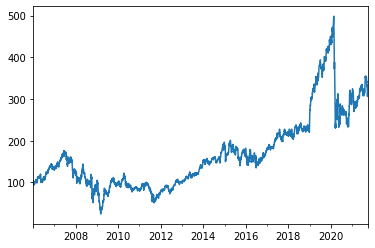

In [10]:
# indice statistics
indice_weight_all = indice_weight.reindex(index=tickers_perf.index, method='ffill')
perf_weighted = tickers_perf.mul(indice_weight_all)
indice_price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
strategie_stats(perf_weighted)

ratio_weight = excel_to_total_weight(all_df_ratio)
new_weight = indice_weight.add(ratio_weight)
new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
perf_weighted_new = tickers_perf.mul(new_weight_all)

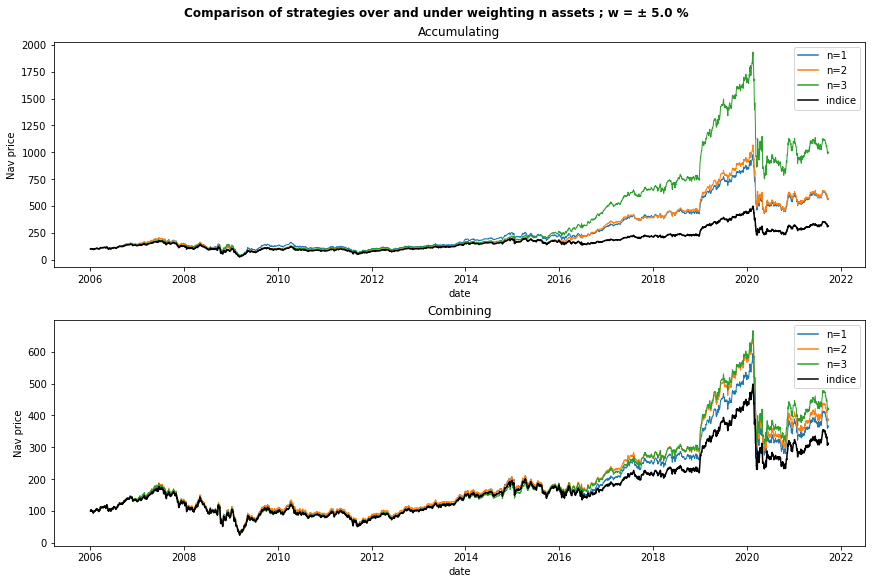

In [11]:
N = 3
weight = 0.05

df_n_prices = pd.DataFrame()
for n in range(1,N+1):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=weight)
    new_weight = indice_weight.add(ratio_weight)
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['n=' + str(n)] = price

df_n_prices_comb = pd.DataFrame()
for n in range(1,N+1):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=weight, combining=True)
    new_weight = indice_weight.add(ratio_weight)
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices_comb['n=' + str(n)] = price


fig, axs = plt.subplots(2,1, figsize=(12,8), constrained_layout=True)
axs = axs.ravel()

sns.lineplot(ax=axs[0], data=df_n_prices, lw=1, palette='tab10', dashes=False)
sns.lineplot(ax=axs[0], data=indice_price, lw=1.5, label='indice', color='black')

sns.lineplot(ax=axs[1], data=df_n_prices_comb, lw=1, palette='tab10', dashes=False)
sns.lineplot(ax=axs[1], data=indice_price, lw=1.5, label='indice', color='black')

fig.suptitle('Comparison of strategies over and under weighting n assets ; w = ± ' + str(100 * weight) + ' %', fontweight='bold')

axs[0].set_title('Accumulating')
axs[1].set_title('Combining')

axs[0].set_xlabel('date')
axs[0].set_ylabel('Nav price')
axs[1].set_xlabel('date')
axs[1].set_ylabel('Nav price')

plt.show()

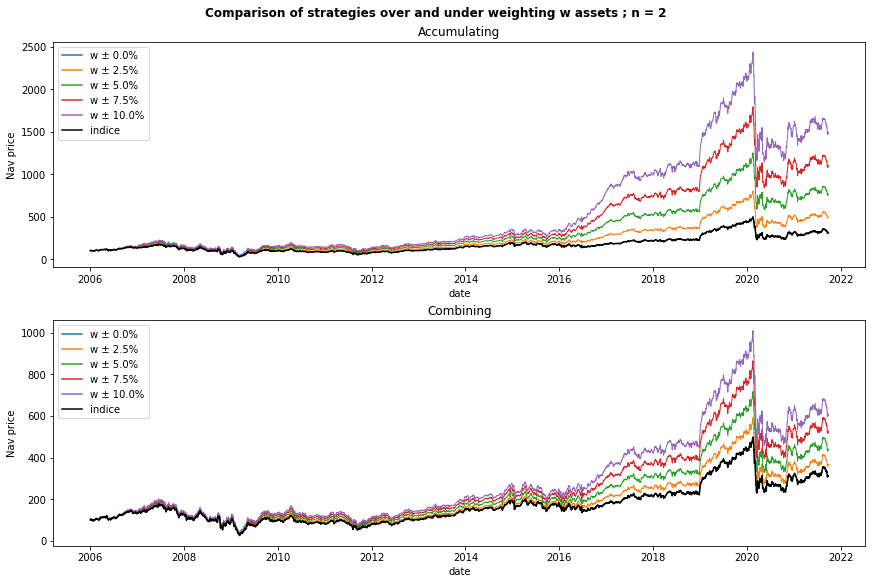

In [12]:
n = 2

df_n_prices = pd.DataFrame()
for w in list(np.linspace(0,0.1,5)):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=w)
    new_weight = indice_weight.add(ratio_weight)
    new_weight[new_weight < 0] = 0
    for index, row in new_weight.iterrows():
        new_weight.loc[index] = new_weight.loc[index] / new_weight.loc[index].sum()
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['w ± ' + str(round(100 * w,3)) + '%'] = price

df_n_prices_comb = pd.DataFrame()
for w in list(np.linspace(0,0.1,5)):
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=w, combining=True)
    new_weight = indice_weight.add(ratio_weight)
    new_weight[new_weight < 0] = 0
    for index, row in new_weight.iterrows():
        new_weight.loc[index] = new_weight.loc[index] / new_weight.loc[index].sum()
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices_comb['w ± ' + str(round(100 * w,3)) + '%'] = price

fig, axs = plt.subplots(2,1, figsize=(12,8), constrained_layout=True)
axs = axs.ravel()

sns.lineplot(ax=axs[0], data=df_n_prices, lw=1, palette='tab10', dashes=False)
sns.lineplot(ax=axs[0], data=indice_price, lw=1.5, label='indice', color='black')

sns.lineplot(ax=axs[1], data=df_n_prices_comb, lw=1, palette='tab10', dashes=False)
sns.lineplot(ax=axs[1], data=indice_price, lw=1.5, label='indice', color='black')

fig.suptitle('Comparison of strategies over and under weighting w assets ; n = ' + str(n), fontweight='bold')

axs[0].set_title('Accumulating')
axs[1].set_title('Combining')

axs[0].set_xlabel('date')
axs[0].set_ylabel('Nav price')
axs[1].set_xlabel('date')
axs[1].set_ylabel('Nav price')

plt.show()

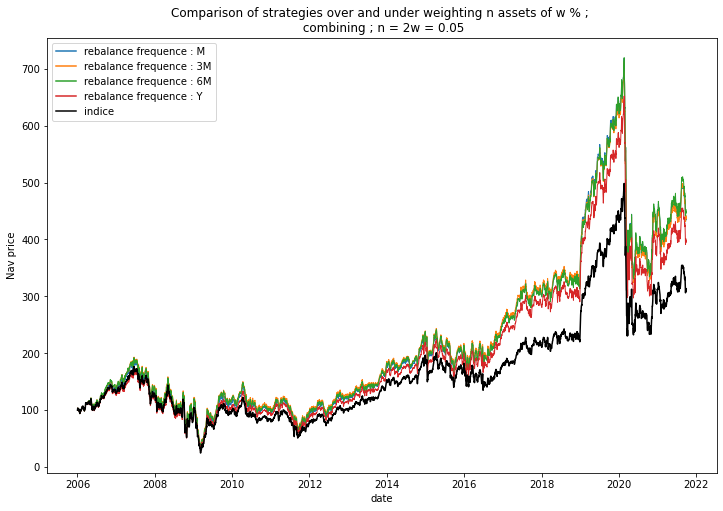

In [13]:
rebalance_frequences = ['M', '3M', '6M', 'Y']
n = 2
w = 0.05
df_n_prices = pd.DataFrame()
for freq in rebalance_frequences:
    ratio_weight = excel_to_total_weight(all_df_ratio, n=n, weight=w, combining=True, rebalance_freq=freq)
    new_weight = indice_weight.add(ratio_weight)
    new_weight[new_weight < 0] = 0
    for index, row in new_weight.iterrows():
        new_weight.loc[index] = new_weight.loc[index] / new_weight.loc[index].sum()
    new_weight_all = new_weight.reindex(index=tickers_perf.index, method='ffill')
    perf_weighted = tickers_perf.mul(new_weight_all)
    price = 100 * ((perf_weighted.sum(axis=1) + 1).cumprod())
    df_n_prices['rebalance frequence : ' + freq] = price

plt.figure(figsize=(12,8))
sns.lineplot(data=df_n_prices, lw=1, palette='tab10', dashes=False)
sns.lineplot(data=indice_price, lw=1.5, label='indice', color='black')
plt.title('Comparison of strategies over and under weighting n assets of w % ; \n combining ; n = ' + str(n) + 'w = ' + str(w))
plt.xlabel('date')
plt.ylabel('Nav price')
plt.show()